# Regularization

In [1]:
import seaborn as sns

## Warm up: overfit the model

In [2]:
import numpy as np
import pandas as pd
np.random.seed(42)
x = np.linspace(0, 20, 15)
y = 5 * x + np.random.normal(0.0, 25, 15)
X = x.reshape(15, 1)

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#### Create first polynomial features for X

In [60]:
poly = PolynomialFeatures(degree= 3 )
poly.fit(X)

PolynomialFeatures(degree=3)

In [61]:
X_poly = poly.transform(X)

In [62]:
X

array([[ 0.        ],
       [ 1.42857143],
       [ 2.85714286],
       [ 4.28571429],
       [ 5.71428571],
       [ 7.14285714],
       [ 8.57142857],
       [10.        ],
       [11.42857143],
       [12.85714286],
       [14.28571429],
       [15.71428571],
       [17.14285714],
       [18.57142857],
       [20.        ]])

In [63]:
X_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.42857143e+00, 2.04081633e+00, 2.91545190e+00],
       [1.00000000e+00, 2.85714286e+00, 8.16326531e+00, 2.33236152e+01],
       [1.00000000e+00, 4.28571429e+00, 1.83673469e+01, 7.87172012e+01],
       [1.00000000e+00, 5.71428571e+00, 3.26530612e+01, 1.86588921e+02],
       [1.00000000e+00, 7.14285714e+00, 5.10204082e+01, 3.64431487e+02],
       [1.00000000e+00, 8.57142857e+00, 7.34693878e+01, 6.29737609e+02],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03],
       [1.00000000e+00, 1.14285714e+01, 1.30612245e+02, 1.49271137e+03],
       [1.00000000e+00, 1.28571429e+01, 1.65306122e+02, 2.12536443e+03],
       [1.00000000e+00, 1.42857143e+01, 2.04081633e+02, 2.91545190e+03],
       [1.00000000e+00, 1.57142857e+01, 2.46938776e+02, 3.88046647e+03],
       [1.00000000e+00, 1.71428571e+01, 2.93877551e+02, 5.03790087e+03],
       [1.00000000e+00, 1.85714286e+01, 3.44897959e

In [64]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [65]:
X_poly = pd.DataFrame(X_poly,columns = poly.get_feature_names_out())
X_poly.head()

,1,x0,x0^2,x0^3
0,1.0,0.000000,0.000000,0.000000
1,1.0,1.428571,2.040816,2.915452
2,1.0,2.857143,8.163265,23.323615
3,1.0,4.285714,18.367347,78.717201
4,1.0,5.714286,32.653061,186.588921


#### Fit linear regression model

In [66]:
lm = LinearRegression()
lm.fit(X_poly,y)

LinearRegression()

In [67]:
lm.score(X_poly, y)

0.5933974081817897

In [68]:
from sklearn.model_selection import cross_val_score
cross_val_score(lm, X_poly, y,cv = 3)

array([-8.99912916,  0.17969611, -0.96747367])

What do you observe from the cross validated result?

In [69]:
y_pred = lm.predict(X_poly)

#### Plot

Text(0.5, 1.0, 'Overfitting with many polynomial features')

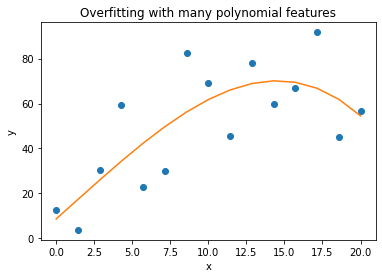

In [70]:
import matplotlib.pyplot as plt
plt.plot(X,y, 'o', label = "true")
plt.plot(X,y_pred, label = "overfitted model")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overfitting with many polynomial features')

# Let's fix this using regularization!

## Ridge

In [71]:
from sklearn.linear_model import Ridge

In [72]:
m_ridge = Ridge(alpha=0.4)
m_ridge.fit(X_poly, y)
ypred_ridge = m_ridge.predict(X_poly)

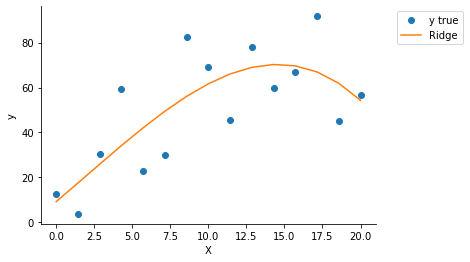

In [73]:
###### plot
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, ypred_ridge, label = 'Ridge')
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

### The alpha parameter in Ridge

In [74]:
import seaborn as sns
import itertools

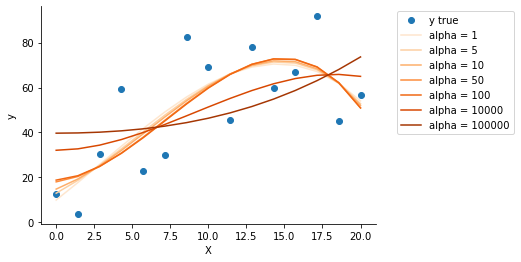

In [75]:
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')

alphas = [1,5,10,50,100,10000, 100000]
palette = itertools.cycle(sns.color_palette("Oranges", len(alphas)))

for i in alphas:
    m_ridge = Ridge(alpha = i)
    m_ridge.fit(X_poly, y)  #Train the linear model with ridge regularization
    ypred_ridge = m_ridge.predict(X_poly)
    plt.plot(X, ypred_ridge, c = next(palette), label = f'alpha = {i}')
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

## Lasso

In [76]:
from sklearn.linear_model import Lasso

In [77]:
m_lasso = Lasso(alpha=0.4)
m_lasso.fit(X_poly,y)
ypred_lasso = m_lasso.predict(X_poly)

/home/arjun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.795e+02, tolerance: 9.588e-01
  model = cd_fast.enet_coordinate_descent(


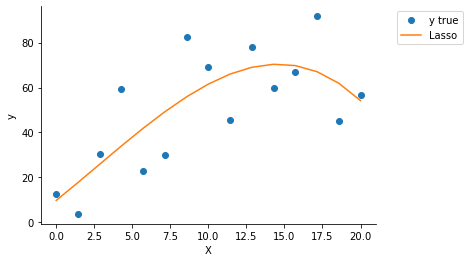

In [78]:
######### Plot
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, ypred_lasso, label = 'Lasso')
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

### The alpha parameter in Lasso

/home/arjun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.382e+02, tolerance: 9.588e-01
  model = cd_fast.enet_coordinate_descent(


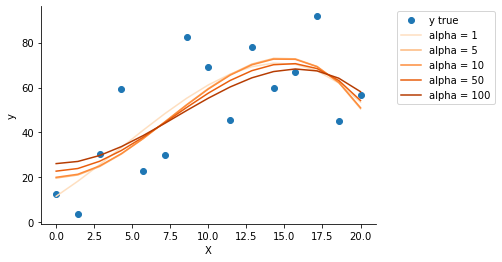

In [79]:
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')

alphas = [1,5,10,50,100]
palette = itertools.cycle(sns.color_palette("Oranges", len(alphas)))

for i in alphas:
    m_lasso = Lasso(alpha = i)
    m_lasso.fit(X_poly, y)  #Train the linear model with ridge regularization
    ypred_lasso = m_lasso.predict(X_poly)
    plt.plot(X, ypred_lasso, c = next(palette), label = f'alpha = {i}')
    
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

## Let's see all together in action

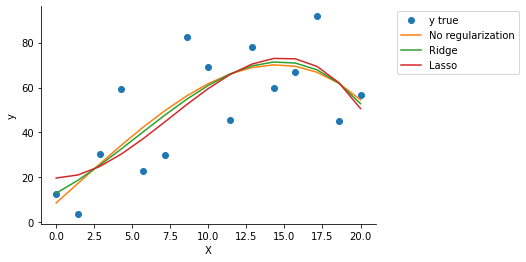

In [80]:
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')

m_ridge = Ridge(alpha=5.0)
m_lasso = Lasso(alpha=5.0)

lm.fit(X_poly, y)        #Train the linear model
m_ridge.fit(X_poly, y)  #Train the linear model with ridge regularization
m_lasso.fit(X_poly, y)  #Train the linear model with lasso regularization

ypred = lm.predict(X_poly)
ypred_ridge = m_ridge.predict(X_poly)
ypred_lasso = m_lasso.predict(X_poly)

plt.plot(X, ypred, label = "No regularization")
plt.plot(X, ypred_ridge, label = "Ridge")
plt.plot(X, ypred_lasso, label = "Lasso")
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

In [81]:
lm.coef_ #Linear Regression coefficients without Regularization

array([ 0.        ,  6.02083829,  0.04531318, -0.01157807])

In [82]:
m_ridge.coef_ #Linear Regression coefficients WITH Ridge Regularization

array([ 0.        ,  3.60483405,  0.32069629, -0.02006126])

In [83]:
m_lasso.coef_ #Linear Regression coefficients WITH Lasso Regularization. NOTE: some were eliminated!

array([ 0.        ,  0.        ,  0.72056724, -0.03216078])

In [84]:
pd.DataFrame({'features': X_poly.columns, 'weights': m_lasso.coef_}).sort_values(by='weights')

,features,weights
3,x0^3,-0.032161
0,1,0.000000
1,x0,0.000000
2,x0^2,0.720567


In [86]:
from sklearn.model_selection import cross_val_score
cross_val_score(m_ridge, X_poly, y,cv = 3)

array([ 0.04988677,  0.15464089, -2.94372102])

In [87]:
## Elastic Net

In [88]:
from sklearn.linear_model import ElasticNet

In [92]:
m_elasticnet = ElasticNet(alpha=0.4, l1_ratio=0.3)
m_elasticnet.fit(X_poly,y)
ypred_elasticnet = m_elasticnet.predict(X_poly)

/home/arjun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+03, tolerance: 9.588e-01
  model = cd_fast.enet_coordinate_descent(


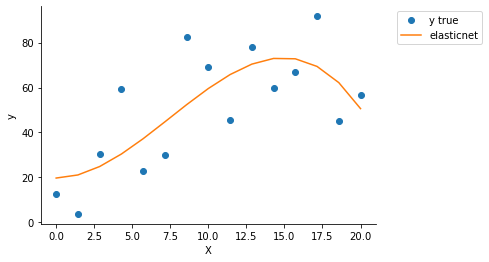

In [93]:
######### Plot
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, ypred_lasso, label = 'elasticnet')
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

In [94]:
from sklearn.model_selection import cross_val_score
cross_val_score(m_elasticnet, X_poly, y,cv = 3)

/home/arjun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.898e+02, tolerance: 3.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/arjun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.921e+02, tolerance: 6.715e-01
  model = cd_fast.enet_coordinate_descent(
/home/arjun/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

array([ 0.06464549,  0.16318194, -1.53837932])